In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from os import open


##### Quiz 2 - Regression (Supervised Learning)

##### Part 1 - (100pts)
A medical insurance company would like you to create a program wherein they will be able to assess if a user is a smoker or not. Based on these findings, the company will then determine how much it will charge a certain client. The following is the flow process of how the program should work:
1. The company is only allowed to ask the following questions:
a. Full name of the client.
b. Sex, age, weight, and height.
c. Number of children
2. The program will then compute the BMI.
3. The program will first consider sex as its first selection.
4. Then the program will then use age, BMI, and number of children to determine if the user is a smoker or not.
5. Then after classifying the smoker feature of the client, the program will then determine how much the client will then be charged based on the age, BMI, and number of children.

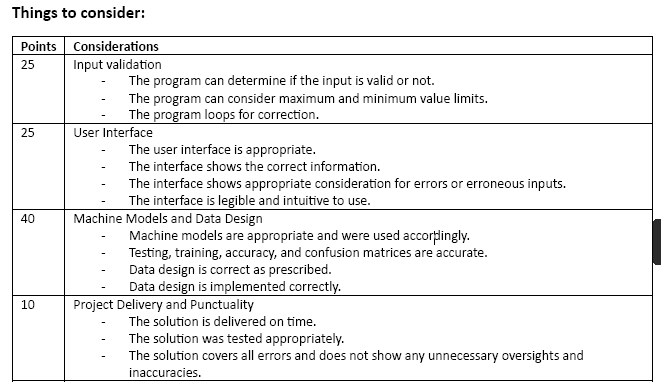

/var/folders/pq/_2xfzl710x79r25081t4ksvw0000gn/T/ipykernel_1431/1436885112.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

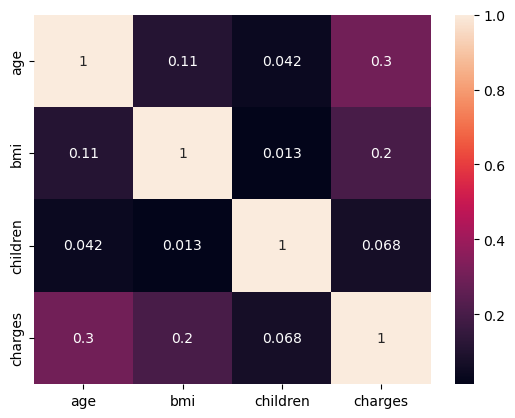

In [148]:
# Analyze the current data set
df = pd.read_csv('datasets/medinsur-1.csv')

# Generate a correlation matrix and plot it using seaborn
corr = df.corr()

# Generate a heatmap using seaborn
sns.heatmap(corr, annot=True)

Text(0.5, 1.0, 'Age vs Charges')

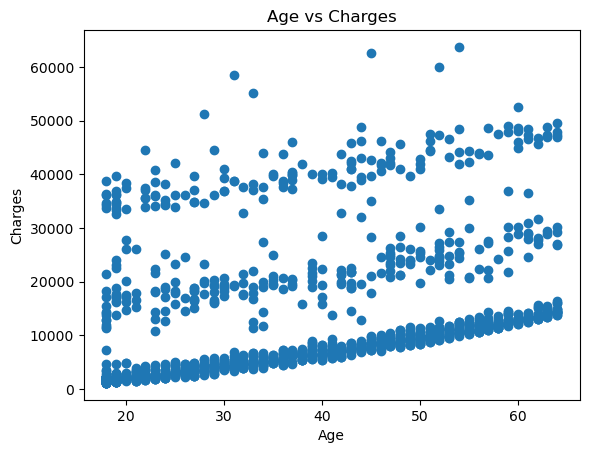

In [149]:
# Generate a scatter plot for age vs charges
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')

#### 1. Train a model that uses sex as it's first selection.

Create/train a model that uses sex as it's main feature. This model will be used to determine if the client is a smoker or not.

In [150]:
# Load the data set
df = pd.read_csv('datasets/medinsur-1.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.920
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.470
4,32,male,28.880,0,no,northwest,3866.855


In [151]:
# Only get the required columns for the model
smoker_sex_x = df[['sex']]

# Get the target column
smoker_sex_y = df[['smoker']]

# Pre-process the data
# Using a label encoder encode the categorical data columns into numerical data
le = LabelEncoder()

smoker_sex_x['sex'] = le.fit_transform(smoker_sex_x['sex'])
smoker_sex_y = le.fit_transform(smoker_sex_y)

# Split the data into training and testing data
smoker_sex_x_train, smoker_sex_x_test, smoker_sex_y_train, smoker_sex_y_test = train_test_split(smoker_sex_x, smoker_sex_y, test_size=0.3, random_state=0)

# Create the model
smoker_sex_classifier = LogisticRegression()
smoker_sex_classifier.fit(smoker_sex_x_train, smoker_sex_y_train)

/var/folders/pq/_2xfzl710x79r25081t4ksvw0000gn/T/ipykernel_1431/463139754.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoker_sex_x['sex'] = le.fit_transform(smoker_sex_x['sex'])
/Users/solstella/Documents/school/cs-machine-learning/env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [152]:
# Create predictions for the training data and test data
smoker_sex_train_preds = smoker_sex_classifier.predict(smoker_sex_x_train)
smoker_sex_test_preds = smoker_sex_classifier.predict(smoker_sex_x_test)


In [153]:
from sklearn.model_selection import cross_val_score

# Evaluate the model by scoring
smoker_sex_score =  smoker_sex_classifier.score(smoker_sex_x_test, smoker_sex_y_test)
print(f"Smoker [Sex] Score Test Data: {smoker_sex_score * 100}")

# Cross Validation Score
smoker_sex_cross_val_score = cross_val_score(smoker_sex_classifier, smoker_sex_x, smoker_sex_y).mean()
print(f"Smoker [Sex] Cross Validation Score: {smoker_sex_cross_val_score * 100}")

Smoker [Sex] Score Test Data: 79.1044776119403
Smoker [Sex] Cross Validation Score: 79.52177315668847


#### 2. Train a model that uses age, BMI, and number of children to determine if the user is a smoker or not.

In [154]:
smoker_all_x = df[['bmi','age', 'children']]
smoker_all_y = df[['smoker']]

le = LabelEncoder()
smoker_all_y['smoker'] = le.fit_transform(smoker_all_y['smoker'])

/var/folders/pq/_2xfzl710x79r25081t4ksvw0000gn/T/ipykernel_1431/620762065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoker_all_y['smoker'] = le.fit_transform(smoker_all_y['smoker'])


In [155]:
# Split the data into training and testing data
smoker_all_x_train, smoker_all_x_test, smoker_all_y_train, smoker_all_y_test = train_test_split(smoker_all_x, smoker_all_y, test_size=0.3, random_state=0)

In [156]:

# Create the model and train
smoker_all_classifier = LogisticRegression()
smoker_all_classifier.fit(smoker_all_x_train, smoker_all_y_train)


/Users/solstella/Documents/school/cs-machine-learning/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [157]:
# Evaluate the model by scoring
smoker_all_score =  smoker_all_classifier.score(smoker_all_x_test, smoker_all_y_test)
print(f"Smoker [All] Score Test Data: {smoker_all_score * 100}")

# Cross Validation Score

smoker_all_cross_val_score = cross_val_score(smoker_all_classifier, smoker_all_x, smoker_all_y).mean()
print(f"Smoker [All] Cross Validation Score: {smoker_all_cross_val_score * 100}")

/Users/solstella/Documents/school/cs-machine-learning/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/solstella/Documents/school/cs-machine-learning/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/solstella/Documents/school/cs-machine-learning/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/solstella/Documents/school/cs-machine-learning/env/lib/python3.

Smoker [All] Score Test Data: 79.1044776119403
Smoker [All] Cross Validation Score: 79.52177315668847


#### 3. Train a model that uses age, BMI, and number of children to determine how much the client will be charged.

In [158]:
smoker_charge_x = df[['age', 'bmi', 'children']]
smoker_charge_y = df[['charges']]

# Split the data into training and testing data
smoker_charge_x_train, smoker_charge_x_test, smoker_charge_y_train, smoker_charge_y_test = train_test_split(smoker_charge_x, smoker_charge_y, test_size=0.3, random_state=0)

# Create the model and train
smoker_charge_regressor = LinearRegression()
smoker_charge_regressor.fit(smoker_charge_x_train, smoker_charge_y_train)

LinearRegression()

In [159]:
# Evaluate the model
smoker_charge_score = smoker_charge_regressor.score(smoker_charge_x_test, smoker_charge_y_test)
print(f"Smoker [Charge] Score Test Data: {smoker_charge_score * 100}")

Smoker [Charge] Score Test Data: 14.974128492400673


In [160]:
import pickle

file = open("")

with open('models/smoker_sex_model.pk', "wb") as f:
    pickle.dump(smoker_sex_classifier, f)
    
with open('models/smoker_all_model.pk', "wb") as f:
    pickle.dump(smoker_all_classifier, f)

with open('models/smoker_charge_model.pk', "wb") as f:
    pickle.dump(smoker_charge_regressor, f)


TypeError: 'str' object cannot be interpreted as an integer